In [92]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import plotly.express as px
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

In [3]:
land = pd.read_excel("Data\Riyadh_Aqqar.xlsx", sheet_name="Land (الاراضي)")

# First Data "Land"

In [4]:
land.shape

(2155, 8)

In [5]:
land.duplicated().sum() 

259

In [6]:
land[land.duplicated()]

,نوع العقار,الغرض,المدينة,الحي,الواجهة,المساحة,سعر المتر,السعر الإجمالي
13,أرض,تجاري وسكني,الرياض,حي اليرموك,جنوبية,1089,3300.0,3593700
19,أرض,تجاري وسكني,الرياض,حي اليرموك,جنوبية,1089,3200.0,3484800
34,أرض,سكني,امارة منطقة الرياض,الرياض,جنوبية,300,1950.0,585000
44,أرض,سكني,الرياض,حي الخليج,شمالية,300,2600.0,780000
50,أرض,سكني,الرياض,حي الحمراء,جنوبية,1000,6000.0,6000000
...,...,...,...,...,...,...,...,...
2063,أرض,سكني,الرياض,الرياض,شرقية,2450,2400.0,5880000
2096,أرض,سكني,الرياض,حي الروضة,جنوبية,627,4200.0,2633400
2116,أرض,سكني,الرياض,حي العارض,ثلاث شوارع,5450,4600.0,25070000
2125,أرض,تجاري,الرياض,حي المهدية,جنوبية,900,7600.0,6840000


In [7]:
land.drop_duplicates(inplace = True)

In [8]:
land.shape

(1896, 8)

In [9]:
land.columns

Index(['نوع العقار', 'الغرض', 'المدينة', 'الحي', 'الواجهة', 'المساحة',
       'سعر المتر', 'السعر الإجمالي'],
      dtype='object')

In [10]:
land["المدينة"].unique()

array([' امارة منطقة الرياض', ' الرياض ', ' حي قرطبة ', ' حي الرمال ',
       13843, ' الدرعية', ' حريملاء', ' العيينة ', ' حي عريض ', ' الرياض',
       ' حي السلي ', ' الجبيلة ', ' حي القيروان ', ' ', ' ضرما',
       ' حي المهدية ', ' رماح', ' حي ظهرة لبن ', ' حي العارض ', ' الخرج'],
      dtype=object)

In [11]:
land.isnull().sum().sort_values(ascending = False)

الغرض             47
نوع العقار         0
المدينة            0
الحي               0
الواجهة            0
المساحة            0
سعر المتر          0
السعر الإجمالي     0
dtype: int64

In [12]:
land[land['الغرض'].isnull()]

,نوع العقار,الغرض,المدينة,الحي,الواجهة,المساحة,سعر المتر,السعر الإجمالي
0,أرض,NaN,امارة منطقة الرياض,الرياض,غربية,375,2900.0,1087500
1,أرض,NaN,الرياض,حي غرناطة,شمالية,800,4800.0,3840000
319,أرض,NaN,الرياض,حي القادسية,شرقية,543,2650.0,1438950
320,أرض,NaN,الرياض,حي العارض,جنوبية,432,2650.0,1144800
321,أرض,NaN,الرياض,حي العارض,جنوبية,747,2650.0,1979550
322,أرض,NaN,امارة منطقة الرياض,الرياض,جنوبية,255,1500.0,382500
323,أرض,NaN,امارة منطقة الرياض,الرياض,شمالية,864,1500.0,1296000
324,أرض,NaN,الرياض,حي النرجس,جنوبية,432,4900.0,2116800
325,أرض,NaN,امارة منطقة الرياض,الرياض,غربية,824,4900.0,4037600
326,أرض,NaN,الدرعية,العيينة,جنوبية,937,4900.0,4591300


In [13]:
land['الغرض'].fillna('Unknown', inplace=True)

C:\Users\Sulaiman\AppData\Local\Temp\ipykernel_65064\4259796565.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  land['الغرض'].fillna('Unknown', inplace=True)


In [14]:
land['الغرض'].head()

0    Unknown
1    Unknown
2       سكني
3       سكني
4       سكني
Name: الغرض, dtype: object

In [15]:
land['المدينة'] = land['المدينة'].str.replace('.*الرياض.*', 'الرياض', regex=True)

In [16]:
land['المدينة'] = land['المدينة'].str.replace('13843', 'الرياض', regex=True)

In [17]:
land['المدينة'] = land['المدينة'].str.replace('.*حي.*', 'الرياض', regex=True)

In [18]:
land['المدينة'] = land['المدينة'].str.replace(' حريملاء', 'حريملاء', regex=True)

In [19]:
land['المدينة'] = land['المدينة'].str.replace(' رماح', 'رماح', regex=True)

In [20]:
land['المدينة'] = land['المدينة'].str.replace('    الدرعية', 'الدرعية', regex=True)

In [21]:
land['المدينة'] = land['المدينة'].str.replace(' العيينة ', 'العيينة', regex=True)

In [22]:
land['المدينة'] = land['المدينة'].str.replace(' الجبيلة', 'الجبيلة', regex=True)

In [23]:
land['المدينة'] = land['المدينة'].str.replace('الدرعية', 'الدرعية', regex=True)

In [24]:
a = ' الدرعية'
b = 'الدرعية'
land['المدينة'] = land['المدينة'].str.replace(a , b, regex=True)

In [25]:
a = ' الخرج'
b = 'الخرج'
land['المدينة'] = land['المدينة'].str.replace(a , b, regex=True)

In [26]:
a = ' ضرما'
b = 'ضرما'
land['المدينة'] = land['المدينة'].str.replace(a , b, regex=True)

In [27]:
a = 'الجبيلة '
b = 'الجبيلة'
land['المدينة'] = land['المدينة'].str.replace(a , b, regex=True)

In [28]:
land['المدينة'].value_counts()

المدينة
الرياض     1614
حريملاء     230
الدرعية      27
رماح          5
الجبيلة       3
              3
العيينة       2
ضرما          2
الخرج         1
Name: count, dtype: int64

In [29]:
land['المدينة'].unique().tolist()

['الرياض',
 nan,
 'الدرعية',
 'حريملاء',
 'العيينة',
 'الجبيلة',
 ' ',
 'ضرما',
 'رماح',
 'الخرج']

In [30]:
# note: ' ' i cant solve it 
land[land['المدينة'] == ' ']

,نوع العقار,الغرض,المدينة,الحي,الواجهة,المساحة,سعر المتر,السعر الإجمالي
1654,أرض,سكني,,حي نمار,شمالية,300,1450.0,435000
1655,أرض,سكني,,حي نمار,جنوبية,623,1450.0,903350
1856,أرض,سكني,,حي نمار,شرقية,375,6700.0,2512500


In [31]:
land['المدينة'] = land['المدينة'].str.replace(' ', 'الرياض', regex=True)

In [32]:
# ---- 
land['المدينة'].unique()

array(['الرياض', nan, 'الدرعية', 'حريملاء', 'العيينة', 'الجبيلة', 'ضرما',
       'رماح', 'الخرج'], dtype=object)

In [33]:
land['الحي'].head()

0               الرياض 
1            حي غرناطة 
2            حي غرناطة 
3           حي اليرموك 
4     حي النسيم الغربي 
Name: الحي, dtype: object

In [34]:
land['الحي'].unique().tolist()

[' الرياض ',
 ' حي غرناطة ',
 ' حي اليرموك ',
 ' حي النسيم الغربي ',
 ' حي الرمال ',
 ' حي الملك فيصل ',
 ' حي المعيزلة ',
 ' حي الشرق ',
 ' حي المونسية ',
 ' حي الروضة ',
 ' حي المشرق ',
 ' حي الخليج ',
 ' حي الشهداء ',
 ' حي الحمراء ',
 ' حي البيان ',
 ' حي قرطبة ',
 ' حي القادسية ',
 ' حي النهضة ',
 ' حي الصناعية القديمة ',
 ' حي العلا ',
 ' حي الجنادرية ',
 ' حي المعيزيلة ',
 ' حي السعادة ',
 ' حي النسيم الشرقي ',
 ' حي خشم العان ',
 ' حي الصفا ',
 ' حي اشبيلية ',
 ' طريق سعيد ابن زيد ',
 ' حي القدس ',
 ' حي الاندلس ',
 ' حي الشعلة ',
 ' حي الندوة ',
 ' حي الفيحاء ',
 ' ',
 ' امارة منطقة الرياض ',
 ' حي المنار ',
 ' حي السلام ',
 ' حي الزاهر ',
 ' حي الجزيرة ',
 ' حي النظيم ',
 ' حي الازدهار ',
 ' حي الملز ',
 ' حي العارض ',
 ' حي النرجس ',
 ' العيينة ',
 ' حي الملقا ',
 ' حي الغنامية ',
 ' حي عرقة ',
 ' حي المهدية ',
 ' حي الدار البيضاء ',
 ' حي سلطانة ',
 ' حي الندى ',
 ' حي ظهرة لبن ',
 ' حي العين ',
 ' حي حطين ',
 ' حي الهدا ',
 ' حي طويق ',
 ' حي المنصورة ',
 ' حي عريض ',
 ' ح

In [35]:
land['الحي'] = land['الحي'].str.replace('.*الرياض.*', 'Unknown', regex=True)

In [36]:
land['الحي'] = land['الحي'].str.replace('.*شارع.*', 'Unknown', regex=True)

In [37]:
land['الحي'] = land['الحي'].str.replace('.*طريق.*', 'Unknown', regex=True)

In [38]:
land['الحي'] = land['الحي'].map(lambda x : 'Unknown' if x == ' ' else x )

In [39]:
land[land['الحي'] == ' ']

,نوع العقار,الغرض,المدينة,الحي,الواجهة,المساحة,سعر المتر,السعر الإجمالي


In [40]:
land.head(10)

,نوع العقار,الغرض,المدينة,الحي,الواجهة,المساحة,سعر المتر,السعر الإجمالي
0,أرض,Unknown,الرياض,Unknown,غربية,375,2900.0,1087500
1,أرض,Unknown,الرياض,حي غرناطة,شمالية,800,4800.0,3840000
2,أرض,سكني,الرياض,حي غرناطة,ثلاث شوارع,1650,4800.0,7920000
3,أرض,سكني,الرياض,حي اليرموك,ثلاث شوارع,1650,4800.0,7920000
4,أرض,سكني,الرياض,حي النسيم الغربي,غربية,750,3200.0,2400000
5,أرض,تجاري وسكني,الرياض,حي الرمال,جنوبية,2400,3300.0,7920000
6,أرض,تجاري وسكني,الرياض,حي الرمال,شمالية,900,3300.0,2970000
7,أرض,تجاري وسكني,الرياض,حي الملك فيصل,شرقية,750,3350.0,2512500
8,أرض,تجاري وسكني,الرياض,حي اليرموك,جنوبية,1089,3300.0,3593700
9,أرض,تجاري وسكني,الرياض,Unknown,غربية,750,2600.0,1950000


In [41]:
land['الغرض'].value_counts()

الغرض
سكني           1275
تجاري وسكني     404
تجاري           170
Unknown          47
Name: count, dtype: int64

In [42]:
land['المدينة'].value_counts()

المدينة
الرياض     1617
حريملاء     230
الدرعية      27
رماح          5
الجبيلة       3
العيينة       2
ضرما          2
الخرج         1
Name: count, dtype: int64

In [43]:
land['الحي'].value_counts()

الحي
Unknown                 567
 حي النرجس              116
 حي المهدية             113
 حي ظهرة لبن             86
 حي الرمال               66
                       ... 
 حي الرفيعة               1
 حي الزهرة                1
 القرينة                  1
 حي العريجاء الوسطى       1
 حي اليمامة               1
Name: count, Length: 134, dtype: int64

In [44]:
land['الواجهة'].unique().tolist()

['غربية',
 'شمالية',
 'ثلاث شوارع',
 'جنوبية',
 'شرقية',
 'شمالية شرقية',
 'جنوبية شرقية',
 'جنوبية غربية',
 'شمالية غربية',
 'أربع شوارع']

# Second Data realEstate

## Loading the data


In [45]:
real_estate = pd.read_csv("Data\\realEstate.csv")

### Viewing the dataframe

In [46]:
real_estate.head()

,user_id,id,title,price,content,imgs,refresh,beds,livings,wc,...,width,length,advertiser_type,create_time,review,profileImg,UserName,iam_verified,onMarket,IsRent
0,1495817,4596035,شقة للإيجار في شارع التغلبي ، حي النظيم ، الري...,20000,1666 كل شهر,"['014958174_1659666836308.jpg', '014958178_165...","['2022-08-06', '12:22:15']",3,0.0,2,...,15.0,15.0,owner,"['2022-08-05', '02:44:23']",5.00,NaN,Thamer,True,17,False
1,496663,4599813,شقة للإيجار في شارع الاقتصاد ، حي الفيحاء ، ال...,25000,شقة ارضية للإيجار بحي الفيحاء شارع الاقتصاد \r...,"['004966630_1659781493595.jpg', '004966636_165...","['2022-08-06', '10:27:57']",3,1.0,2,...,NaN,NaN,exclusive_marketer,"['2022-08-06', '10:27:56']",4.33,yes,الاركان الثابته للعقارات,True,5,True
2,2412431,4554519,شقة للإيجار في شارع أبي الحسن الأسفرائيني ، حي...,22000,شقه للايجار حي الرمال \r\nمكون\r\nالدور ثالث\r...,"['023243548_1658701693777.jpg', '023243549_165...","['2022-08-06', '06:59:03']",3,1.0,2,...,10.0,20.0,normal_marketer,"['2022-07-24', '22:27:27']",4.67,NaN,مكتب منزلك الفاخر,True,15,True
3,1906500,4120004,شقة للإيجار في شارع أسيد بن ثعلبة ، حي العقيق ...,38000,شقه عوائل نظيفه جدا \r\nغرفه كبيره وصاله كبيره...,"['019065004_1659758037501.jpg', '019065000_165...","['2022-08-06', '03:52:58']",1,1.0,1,...,NaN,NaN,owner,"['2022-03-10', '09:17:01']",4.17,NaN,ابو مصطفى,True,165,False
4,1741562,4498954,شقة للإيجار في شارع العباس بن عبدالمطلب ، حي ا...,25000,غرفه وصاله وحمام راكب مطبخ\r\nراكب مكيفات مؤثث...,"['017415629_1657025837185.jpg', '017415620_165...","['2022-08-03', '10:53:47']",1,1.0,1,...,7.0,9.0,normal_marketer,"['2022-07-05', '13:03:54']",4.42,NaN,عقار المستقبل,True,48,False


## 1. Data Profiling:

In [47]:
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6762 entries, 0 to 6761
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          6762 non-null   int64  
 1   id               6762 non-null   int64  
 2   title            6762 non-null   object 
 3   price            6762 non-null   int64  
 4   content          6668 non-null   object 
 5   imgs             6119 non-null   object 
 6   refresh          6762 non-null   object 
 7   beds             6762 non-null   int64  
 8   livings          6760 non-null   float64
 9   wc               6762 non-null   int64  
 10  area             6587 non-null   float64
 11  street_width     6552 non-null   float64
 12  age              6057 non-null   float64
 13  last_update      6762 non-null   object 
 14  ketchen          6745 non-null   float64
 15  ac               6743 non-null   float64
 16  furnished        6717 non-null   float64
 17  location      

In [48]:
real_estate.shape

(6762, 30)

In [49]:
real_estate.describe()

,user_id,id,price,beds,livings,wc,area,street_width,age,ketchen,ac,furnished,width,length,review,onMarket
count,6.762000e+03,6.762000e+03,6762.000000,6762.000000,6760.000000,6762.000000,6.587000e+03,6552.000000,6057.000000,6745.000000,6743.000000,6717.000000,4662.000000,4662.000000,6363.000000,6762.000000
mean,1.325257e+06,4.475689e+06,43274.639899,2.569802,0.990680,2.066105,1.880134e+03,23.141331,2.862968,0.869978,0.722379,0.078160,17.850322,47.169254,4.344400,49.796066
std,8.326004e+05,1.934656e+05,28860.914338,1.117260,0.461318,0.928238,1.369202e+05,13.793542,4.657175,0.336353,0.447859,0.268443,35.434895,1627.623997,0.481803,71.213069
min,7.000000e+00,2.118990e+05,55.000000,1.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,5.809750e+05,4.446396e+06,25000.000000,2.000000,1.000000,1.000000,9.800000e+01,15.000000,0.000000,1.000000,0.000000,0.000000,8.000000,9.000000,4.200000,19.000000
50%,1.203756e+06,4.528259e+06,35000.000000,3.000000,1.000000,2.000000,1.450000e+02,20.000000,1.000000,1.000000,1.000000,0.000000,11.000000,12.000000,4.380000,32.000000
75%,2.072661e+06,4.573634e+06,55000.000000,3.000000,1.000000,3.000000,1.800000e+02,30.000000,4.000000,1.000000,1.000000,0.000000,15.000000,18.000000,4.560000,61.000000
max,2.685054e+06,4.600241e+06,450000.000000,7.000000,5.000000,5.000000,1.111110e+07,100.000000,36.000000,1.000000,1.000000,1.000000,1000.000000,111111.000000,5.000000,2279.000000


In [50]:
real_estate.columns

Index(['user_id', 'id', 'title', 'price', 'content', 'imgs', 'refresh', 'beds',
       'livings', 'wc', 'area', 'street_width', 'age', 'last_update',
       'ketchen', 'ac', 'furnished', 'location', 'path', 'district', 'width',
       'length', 'advertiser_type', 'create_time', 'review', 'profileImg',
       'UserName', 'iam_verified', 'onMarket', 'IsRent'],
      dtype='object')

#### 1. Reliability:


#### 2. Timeliness: 


#### 3. Consistency: 

#### 4. Relevance: 
there are some columns that are not relevant to us so we can drop them, here they are:
- usr id
- id
- refresh 
- last_update
- img
- creation time
- location
- profileImg
- UserName
- **length:** most of them are incorrect, and we already have the area which is more important.
- **width:** most of them are incorrect, and we already have the area which is more important.

In [51]:
real_estate.isna().sum()

user_id               0
id                    0
title                 0
price                 0
content              94
imgs                643
refresh               0
beds                  0
livings               2
wc                    0
area                175
street_width        210
age                 705
last_update           0
ketchen              17
ac                   19
furnished            45
location              0
path                  0
district              0
width              2100
length             2100
advertiser_type     240
create_time           0
review              399
profileImg         2746
UserName             93
iam_verified        146
onMarket              0
IsRent                0
dtype: int64

In [52]:
real_estate.columns

Index(['user_id', 'id', 'title', 'price', 'content', 'imgs', 'refresh', 'beds',
       'livings', 'wc', 'area', 'street_width', 'age', 'last_update',
       'ketchen', 'ac', 'furnished', 'location', 'path', 'district', 'width',
       'length', 'advertiser_type', 'create_time', 'review', 'profileImg',
       'UserName', 'iam_verified', 'onMarket', 'IsRent'],
      dtype='object')

In [53]:
real_state_selected_columns = ['title', 'price', 'content', 'beds',
       'livings', 'wc', 'area', 'street_width', 'age', 'last_update',
       'ketchen', 'ac', 'furnished', 'location', 'path', 'district',
       'advertiser_type', 'create_time', 'review', 'profileImg',
       'UserName', 'iam_verified', 'onMarket', 'IsRent']

In [54]:
real_estate.drop(["user_id"],axis=1,inplace=True)
real_estate.drop(["id"],axis=1,inplace=True)
real_estate.drop(["refresh"],axis=1,inplace=True)
real_estate.drop(["last_update"],axis=1,inplace=True)
real_estate.drop(["imgs"],axis=1,inplace=True)
real_estate.drop(["create_time"],axis=1,inplace=True)
real_estate.drop(["location"],axis=1,inplace=True)
real_estate.drop(["profileImg"],axis=1,inplace=True)
real_estate.drop(["UserName"],axis=1,inplace=True)
real_estate.drop(["width"],axis=1,inplace=True)
real_estate.drop(["length"],axis=1,inplace=True)

In [55]:
real_estate.columns

Index(['title', 'price', 'content', 'beds', 'livings', 'wc', 'area',
       'street_width', 'age', 'ketchen', 'ac', 'furnished', 'path', 'district',
       'advertiser_type', 'review', 'iam_verified', 'onMarket', 'IsRent'],
      dtype='object')

In [56]:
real_estate.head(2)

,title,price,content,beds,livings,wc,area,street_width,age,ketchen,ac,furnished,path,district,advertiser_type,review,iam_verified,onMarket,IsRent
0,شقة للإيجار في شارع التغلبي ، حي النظيم ، الري...,20000,1666 كل شهر,3,0.0,2,225.0,15.0,9.0,1.0,0.0,0.0,/شقق-للإيجار/الرياض/شرق-الرياض/حي-النظيم/شارع-...,حي النظيم,owner,5.00,True,17,False
1,شقة للإيجار في شارع الاقتصاد ، حي الفيحاء ، ال...,25000,شقة ارضية للإيجار بحي الفيحاء شارع الاقتصاد \r...,3,1.0,2,130.0,30.0,12.0,1.0,0.0,0.0,/شقق-للإيجار/الرياض/شرق-الرياض/حي-الفيحاء/شارع...,حي الفيحاء,exclusive_marketer,4.33,True,5,True


#### 5. Uniqueness: 


In [57]:
real_estate.duplicated().sum()

0

#### 6. Completeness: 


In [58]:
real_estate.isnull().sum().sort_values(ascending=False)

age                705
review             399
advertiser_type    240
street_width       210
area               175
iam_verified       146
content             94
furnished           45
ac                  19
ketchen             17
livings              2
district             0
onMarket             0
title                0
path                 0
price                0
wc                   0
beds                 0
IsRent               0
dtype: int64

#### 7. Check Accuracy:


## 2.Data Cleaning

In [59]:
real_estate['livings'].unique()

array([ 0.,  1.,  2.,  3.,  4., nan,  5.])

In [60]:
real_estate[real_estate['livings'].isnull()]

,title,price,content,beds,livings,wc,area,street_width,age,ketchen,ac,furnished,path,district,advertiser_type,review,iam_verified,onMarket,IsRent
2923,شقة للإيجار في طريق الملك فهد الفرعي ، حي المؤ...,80000,يوجد شقق استوديو للايجار السنوي فقط في أبراج د...,1,NaN,1,43.0,NaN,0.0,1.0,1.0,1.0,/شقق-للإيجار/الرياض/شمال-الرياض/حي-المؤتمرات/ط...,حي المؤتمرات,agent,NaN,True,28,False
5752,شقة للإيجار في شارع وادي السرح ، حي الوادي ، ا...,18000,للايجار غرفة عزابي بعمارة بحي الوادي بالرياض ع...,1,NaN,1,50.0,18.0,6.0,NaN,1.0,NaN,/شقق-للإيجار/الرياض/شمال-الرياض/حي-الوادي/شارع...,حي الوادي,owner,4.23,True,137,False


In [61]:
real_estate['livings'].fillna(-1, inplace=True)


C:\Users\Sulaiman\AppData\Local\Temp\ipykernel_65064\2741156563.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  real_estate['livings'].fillna(-1, inplace=True)


In [62]:
real_estate['street_width'].unique()

array([ 15.,  30.,  25.,  34.,  39.,  35.,  nan,  18.,  27.,  29.,  20.,
         5.,  21.,  65.,  36.,  37.,  24.,   1.,  33.,  40., 100.,  12.,
        38.,  81.,  28.,  22.,  60.,  45.,  31.,  32.,  11.,  16.,  19.,
        70.,  74.,  26.,  23.,  50.,  14.,  17.,  57.,  56.,  10.,  73.,
        44.,  49.,  76.,  80.,  59.,  51.,  63.,   0.,  53.,  61.,  13.,
        47.,   9.,  52.,  42.,  43.,  75.,  55.,   8.,  46.,  48.,  41.,
        68.,   7.,  58.,  62.,  64.,  71.,  90.,  54.,   6.,  69.,  66.,
        93.,  82.,  77.,  79.,  87.])

In [63]:
real_estate['street_width'].fillna(-1, inplace=True)

C:\Users\Sulaiman\AppData\Local\Temp\ipykernel_65064\4254961522.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  real_estate['street_width'].fillna(-1, inplace=True)


In [64]:
real_estate['street_width'].value_counts()

street_width
5.0     1111
20.0     934
30.0     764
15.0     684
36.0     385
        ... 
73.0       1
82.0       1
77.0       1
79.0       1
87.0       1
Name: count, Length: 82, dtype: int64

In [65]:
real_estate['area'].fillna(-1, inplace=True)

C:\Users\Sulaiman\AppData\Local\Temp\ipykernel_65064\3422354964.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  real_estate['area'].fillna(-1, inplace=True)


In [66]:
real_estate['area'].value_counts()

area
150.0    761
100.0    471
200.0    401
120.0    390
80.0     308
        ... 
229.0      1
554.0      1
66.0       1
303.0      1
258.0      1
Name: count, Length: 281, dtype: int64

In [67]:
real_estate['content'].unique()

array(['1666 كل شهر',
       'شقة ارضية للإيجار بحي الفيحاء شارع الاقتصاد \r\nعبارة عن \r\nمجلس \r\nصالة \r\nمطبخ \r\nغرفتين نوم \r\n٢ دورة مياه \r\nمطبخ راكب وعداد كهرباء مستقل \r\nللتواصل والمعاينة واتس اب \r\n0555222431\r\n0552222479\r\nمعلن رقم 6681833',
       'شقه للايجار حي الرمال \r\nمكون\r\nالدور ثالث\r\n ثلاث غرف نوم كبيره ودورتين مياه\r\n وصاله كبيره \r\nومجلس\r\nالمساحه  200 م٢\r\n السعر 22\r\n\r\nعبدالله مد ترأس وتساب',
       ...,
       'شقة مؤثثة بالكامل دور اول مجلس وصالة وغرفتين نوم ومطبخ ودورتين مياه.\r\nمطبخ راكب ومكيفات.\r\n عداد كهرباء متصل مع الشقة الأخرى.\r\nالشقة نظيفة وفي مكان رائع بجانب جامع البلوي',
       'عرض رقم 1320\r\n\r\nبسم الله الرحمن الرحيم\r\nالرجاء قراءة الاعلان بشكل واضح\r\nالسلام عليكم ورحمة الله وبركاته\r\n\r\nشقه للايجار دور اول\r\n دفعه 40الف دفعتين 43 الف\r\n\r\nغرفتين وصاله ومجلس 2 دورات مياه \r\nومطبخ \r\nراكب مكيفات ومطبخ \r\nعمرها سنه\r\n\r\nللتواصل عيد\r\n\u202a0558962838\u202c\r\nمؤسسة عثمان العبرة العقارية\r\nخدماتنا :تسويق -ادراة امل

In [68]:
real_estate['content'].fillna('Empty', inplace=True)

C:\Users\Sulaiman\AppData\Local\Temp\ipykernel_65064\2506601043.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  real_estate['content'].fillna('Empty', inplace=True)


In [69]:
real_estate['age'].value_counts()

age
0.0     2754
3.0      544
2.0      544
5.0      450
1.0      448
4.0      431
7.0      145
6.0      142
10.0     123
8.0      102
9.0       73
20.0      43
11.0      34
15.0      34
12.0      30
16.0      17
30.0      16
13.0      16
25.0      15
14.0      12
17.0      11
22.0      11
19.0      10
18.0       8
36.0       6
24.0       5
23.0       5
26.0       5
21.0       4
34.0       4
29.0       4
35.0       4
27.0       3
28.0       2
32.0       1
33.0       1
Name: count, dtype: int64

In [70]:
real_estate['age'].fillna(-1, inplace=True)

C:\Users\Sulaiman\AppData\Local\Temp\ipykernel_65064\3829257740.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  real_estate['age'].fillna(-1, inplace=True)


In [71]:
real_estate['iam_verified'].unique()

array([True, nan, False], dtype=object)

In [72]:
real_estate['ketchen'].unique()

array([ 1.,  0., nan])

In [73]:
real_estate['ketchen'].fillna(-1, inplace=True)

C:\Users\Sulaiman\AppData\Local\Temp\ipykernel_65064\1047363742.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  real_estate['ketchen'].fillna(-1, inplace=True)


In [74]:
real_estate['ac'].unique()

array([ 0.,  1., nan])

In [75]:
real_estate['ac'].fillna(-1, inplace=True)

C:\Users\Sulaiman\AppData\Local\Temp\ipykernel_65064\513929238.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  real_estate['ac'].fillna(-1, inplace=True)


In [76]:
real_estate['furnished'].unique()

array([ 0.,  1., nan])

In [77]:
real_estate['furnished'].fillna(-1, inplace=True)

C:\Users\Sulaiman\AppData\Local\Temp\ipykernel_65064\2258905594.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  real_estate['furnished'].fillna(-1, inplace=True)


In [78]:
real_estate['advertiser_type'].unique()

array(['owner', 'exclusive_marketer', 'normal_marketer', nan, 'agent'],
      dtype=object)

In [79]:
real_estate['advertiser_type'].fillna('Unknown!', inplace=True)

C:\Users\Sulaiman\AppData\Local\Temp\ipykernel_65064\3057642781.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  real_estate['advertiser_type'].fillna('Unknown!', inplace=True)


In [80]:
real_estate['review'].unique()

array([5.  , 4.33, 4.67, 4.17, 4.42, 4.47, 4.54, 3.76, 4.38, 4.79, 4.29,
       4.4 , 4.31,  nan, 2.33, 4.35, 3.94, 4.26, 4.04, 4.56, 1.  , 3.27,
       4.11, 4.34, 4.36, 4.52, 3.5 , 3.98, 4.43, 4.  , 4.09, 3.96, 4.7 ,
       4.59, 4.62, 4.21, 4.05, 4.74, 4.81, 3.67, 4.22, 4.64, 3.73, 4.78,
       3.74, 4.48, 4.39, 4.2 , 4.15, 4.49, 4.69, 4.72, 4.75, 4.57, 4.44,
       4.5 , 4.3 , 3.75, 3.44, 4.14, 4.37, 4.83, 4.25, 4.08, 4.85, 4.1 ,
       3.97, 4.06, 4.45, 3.88, 3.72, 3.83, 4.89, 4.19, 4.46, 4.07, 4.28,
       4.87, 3.38, 4.66, 4.63, 4.55, 3.89, 4.41, 4.58, 4.9 , 3.93, 4.6 ,
       3.86, 4.51, 4.96, 3.99, 4.01, 4.65, 4.93, 3.  , 4.23, 4.71, 4.77,
       4.82, 4.18, 4.68, 3.95, 4.61, 4.27, 4.91, 3.51, 3.82, 4.92, 4.32,
       4.86, 4.12, 4.24, 3.69, 4.16, 3.4 , 3.84, 3.9 , 4.84, 3.77, 3.81,
       3.48, 3.43, 3.64, 4.88, 4.13, 3.87, 3.92, 4.73, 4.76, 3.91, 3.59,
       4.8 , 2.93, 2.  , 4.03, 3.8 , 3.06, 3.68, 3.1 , 4.53, 3.6 , 3.23,
       3.7 , 3.2 , 3.61, 3.63, 3.3 , 3.35, 4.94, 3.

In [81]:
real_estate['review'].fillna(-1, inplace=True)

C:\Users\Sulaiman\AppData\Local\Temp\ipykernel_65064\3057692857.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  real_estate['review'].fillna(-1, inplace=True)


In [82]:
real_estate['iam_verified'].unique()

array([True, nan, False], dtype=object)

In [83]:
real_estate['iam_verified'].fillna(-1, inplace=True)

C:\Users\Sulaiman\AppData\Local\Temp\ipykernel_65064\2585541037.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  real_estate['iam_verified'].fillna(-1, inplace=True)


****************************
We create new column called location to extract the general location (east, west, north, south of Riyadh) from the path column

In [84]:
real_estate['location'] = real_estate['path'].map(lambda x : x.split('/')[3])

In [85]:
real_estate['location'].unique()

array(['شرق-الرياض', 'شمال-الرياض', 'غرب-الرياض', 'وسط-الرياض',
       'جنوب-الرياض'], dtype=object)

In [86]:
real_estate.isna().sum()

title              0
price              0
content            0
beds               0
livings            0
wc                 0
area               0
street_width       0
age                0
ketchen            0
ac                 0
furnished          0
path               0
district           0
advertiser_type    0
review             0
iam_verified       0
onMarket           0
IsRent             0
location           0
dtype: int64

In [87]:
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6762 entries, 0 to 6761
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            6762 non-null   object 
 1   price            6762 non-null   int64  
 2   content          6762 non-null   object 
 3   beds             6762 non-null   int64  
 4   livings          6762 non-null   float64
 5   wc               6762 non-null   int64  
 6   area             6762 non-null   float64
 7   street_width     6762 non-null   float64
 8   age              6762 non-null   float64
 9   ketchen          6762 non-null   float64
 10  ac               6762 non-null   float64
 11  furnished        6762 non-null   float64
 12  path             6762 non-null   object 
 13  district         6762 non-null   object 
 14  advertiser_type  6762 non-null   object 
 15  review           6762 non-null   float64
 16  iam_verified     6762 non-null   object 
 17  onMarket      

In [88]:
real_estate.head()

,title,price,content,beds,livings,wc,area,street_width,age,ketchen,ac,furnished,path,district,advertiser_type,review,iam_verified,onMarket,IsRent,location
0,شقة للإيجار في شارع التغلبي ، حي النظيم ، الري...,20000,1666 كل شهر,3,0.0,2,225.0,15.0,9.0,1.0,0.0,0.0,/شقق-للإيجار/الرياض/شرق-الرياض/حي-النظيم/شارع-...,حي النظيم,owner,5.00,True,17,False,شرق-الرياض
1,شقة للإيجار في شارع الاقتصاد ، حي الفيحاء ، ال...,25000,شقة ارضية للإيجار بحي الفيحاء شارع الاقتصاد \r...,3,1.0,2,130.0,30.0,12.0,1.0,0.0,0.0,/شقق-للإيجار/الرياض/شرق-الرياض/حي-الفيحاء/شارع...,حي الفيحاء,exclusive_marketer,4.33,True,5,True,شرق-الرياض
2,شقة للإيجار في شارع أبي الحسن الأسفرائيني ، حي...,22000,شقه للايجار حي الرمال \r\nمكون\r\nالدور ثالث\r...,3,1.0,2,200.0,25.0,-1.0,0.0,0.0,0.0,/شقق-للإيجار/الرياض/شرق-الرياض/حي-الرمال/شارع-...,حي الرمال,normal_marketer,4.67,True,15,True,شرق-الرياض
3,شقة للإيجار في شارع أسيد بن ثعلبة ، حي العقيق ...,38000,شقه عوائل نظيفه جدا \r\nغرفه كبيره وصاله كبيره...,1,1.0,1,120.0,34.0,0.0,1.0,1.0,0.0,/شقق-للإيجار/الرياض/شمال-الرياض/حي-العقيق/شارع...,حي العقيق,owner,4.17,True,165,False,شمال-الرياض
4,شقة للإيجار في شارع العباس بن عبدالمطلب ، حي ا...,25000,غرفه وصاله وحمام راكب مطبخ\r\nراكب مكيفات مؤثث...,1,1.0,1,60.0,39.0,9.0,1.0,1.0,0.0,/شقق-للإيجار/الرياض/شمال-الرياض/حي-التعاون/شار...,حي التعاون,normal_marketer,4.42,True,48,False,شمال-الرياض


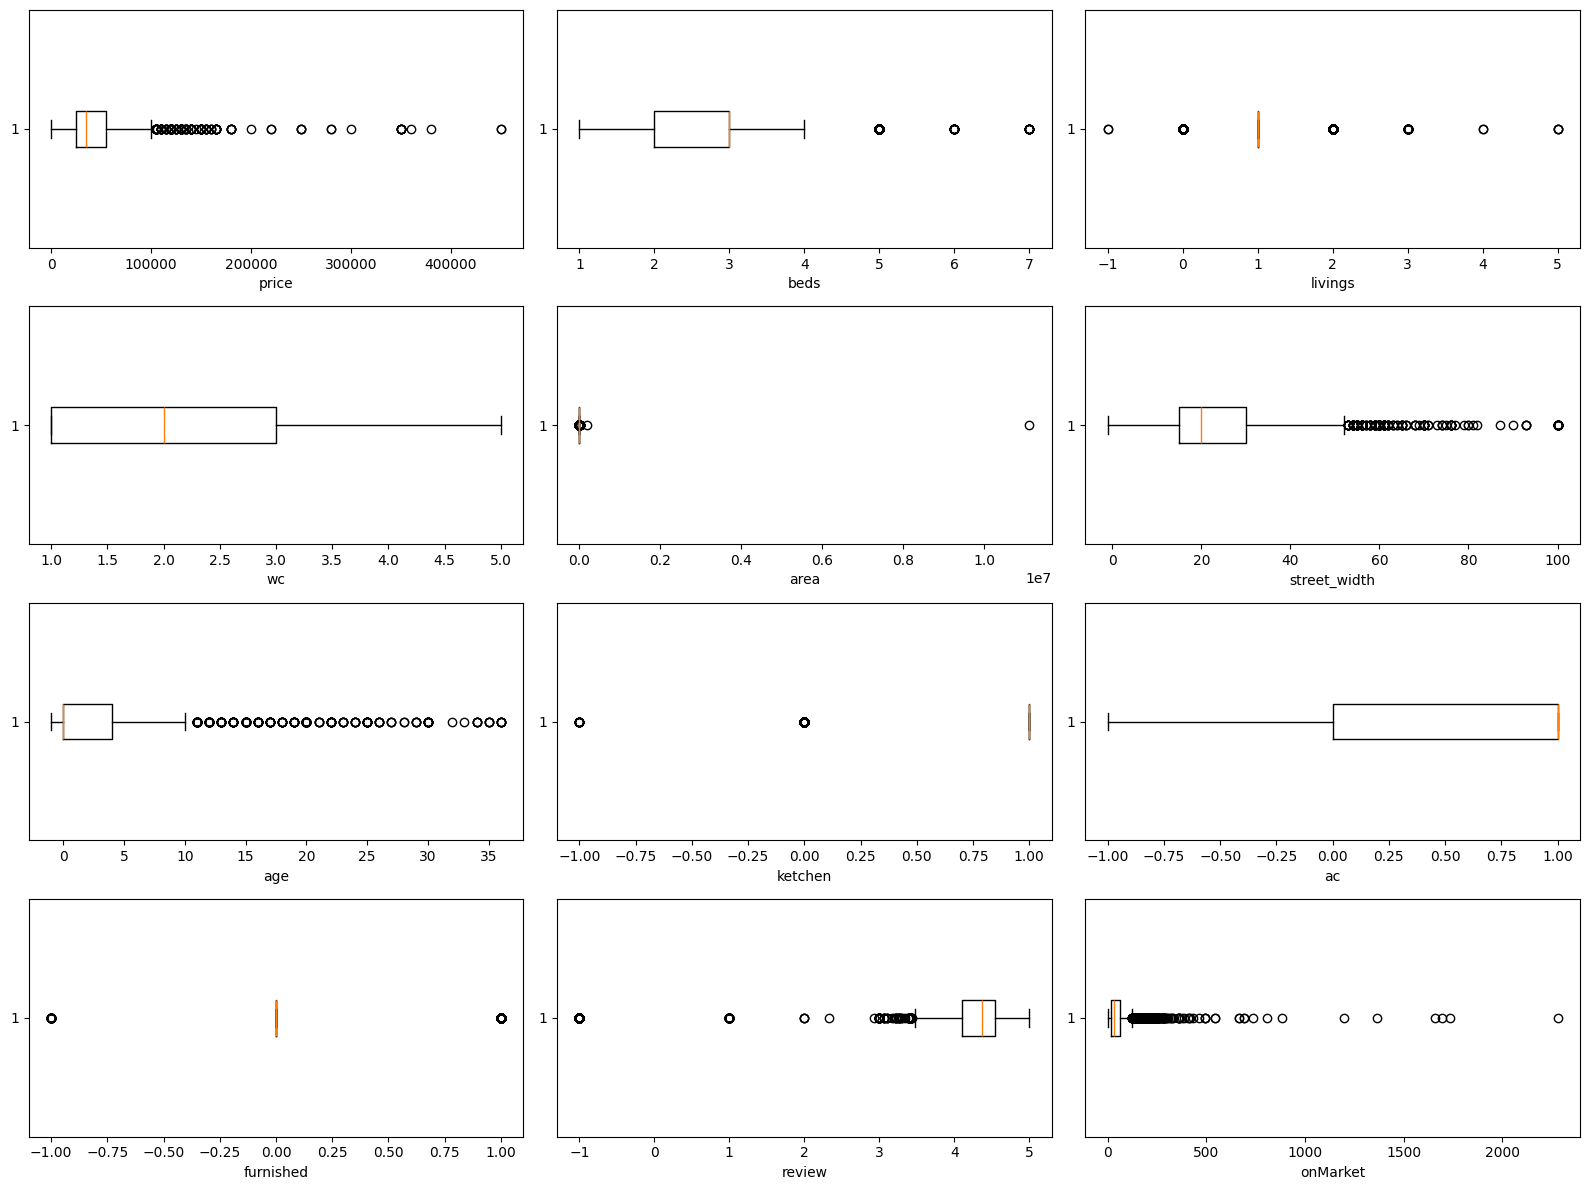

In [89]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your DataFrame is named real_state
numerical_cols = real_estate.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)
    plt.boxplot(real_estate[col], vert=False)
    plt.xlabel(col)
plt.tight_layout()
plt.show()



In [90]:
land.columns

Index(['نوع العقار', 'الغرض', 'المدينة', 'الحي', 'الواجهة', 'المساحة',
       'سعر المتر', 'السعر الإجمالي'],
      dtype='object')

In [94]:
land_type = land['الغرض'].value_counts()

In [95]:
fig = px.pie(land_type, values=land_type.values, names=land_type.index, title='Sample Pie Chart')

# Show the pie chart
fig.show()

In [97]:
real_estate_location = real_estate['location'].value_counts()

In [98]:
fig = px.pie(real_estate_location, values=real_estate_location.values, names=real_estate_location.index, title='Sample Pie Chart')

# Show the pie chart
fig.show()

In [102]:
fig = px.histogram(real_estate, x='price', nbins=10, title='')

# Show the histogram
fig.show()

In [103]:
real_estate.head()

,title,price,content,beds,livings,wc,area,street_width,age,ketchen,ac,furnished,path,district,advertiser_type,review,iam_verified,onMarket,IsRent,location
0,شقة للإيجار في شارع التغلبي ، حي النظيم ، الري...,20000,1666 كل شهر,3,0.0,2,225.0,15.0,9.0,1.0,0.0,0.0,/شقق-للإيجار/الرياض/شرق-الرياض/حي-النظيم/شارع-...,حي النظيم,owner,5.00,True,17,False,شرق-الرياض
1,شقة للإيجار في شارع الاقتصاد ، حي الفيحاء ، ال...,25000,شقة ارضية للإيجار بحي الفيحاء شارع الاقتصاد \r...,3,1.0,2,130.0,30.0,12.0,1.0,0.0,0.0,/شقق-للإيجار/الرياض/شرق-الرياض/حي-الفيحاء/شارع...,حي الفيحاء,exclusive_marketer,4.33,True,5,True,شرق-الرياض
2,شقة للإيجار في شارع أبي الحسن الأسفرائيني ، حي...,22000,شقه للايجار حي الرمال \r\nمكون\r\nالدور ثالث\r...,3,1.0,2,200.0,25.0,-1.0,0.0,0.0,0.0,/شقق-للإيجار/الرياض/شرق-الرياض/حي-الرمال/شارع-...,حي الرمال,normal_marketer,4.67,True,15,True,شرق-الرياض
3,شقة للإيجار في شارع أسيد بن ثعلبة ، حي العقيق ...,38000,شقه عوائل نظيفه جدا \r\nغرفه كبيره وصاله كبيره...,1,1.0,1,120.0,34.0,0.0,1.0,1.0,0.0,/شقق-للإيجار/الرياض/شمال-الرياض/حي-العقيق/شارع...,حي العقيق,owner,4.17,True,165,False,شمال-الرياض
4,شقة للإيجار في شارع العباس بن عبدالمطلب ، حي ا...,25000,غرفه وصاله وحمام راكب مطبخ\r\nراكب مكيفات مؤثث...,1,1.0,1,60.0,39.0,9.0,1.0,1.0,0.0,/شقق-للإيجار/الرياض/شمال-الرياض/حي-التعاون/شار...,حي التعاون,normal_marketer,4.42,True,48,False,شمال-الرياض


In [112]:
price_avg = real_estate[['price', 'location']]

In [118]:
price_avg2 =price_avg.groupby('location').mean('price')

In [122]:
price_avg2

Index(['price'], dtype='object')

In [125]:
fig = px.bar(price_avg2, x=price_avg2.index, y='price', title='Sample Bar Chart', color_discrete_sequence=['#9cdcdd'])

# Show the bar chart
fig.show()